<font color="#9A3F3F"><b>Document Analysis using LLM</b></font>

<font color="#9A3F3F"><b>Introduction</b></font>

Document analysis involves extracting, interpreting, and understanding the information contained in text documents. Traditionally, this task required manual review or simple keyword-based methods, which were time-consuming and often inaccurate. With the rise of Large Language Models (LLMs) like GPT and BERT, document analysis can now be performed more efficiently and accurately. LLMs can comprehend context, generate summaries, answer questions, and identify key insights automatically.

In this project, we will analyze documents using Python and LLMs, focusing on extracting meaningful information from PDFs, summarizing content, and performing text-based queries to derive actionable insights.

<font color="#9A3F3F"><b>Requirements</b></font>

In [ ]:
#!pip install pdfplumber

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import pdfplumber
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

<font color="#9A3F3F"><b>Data Import</b></font>

In [ ]:
pdf_path = "google_terms.pdf"
text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text += page.extract_text() + "\n"

lines = text.split("\n")
df = pd.DataFrame(lines, columns=["Text"])

In [ ]:
df.head()

,Text
0,GOOGLE TERMS OF SERVICE
1,"Effective May 22, 2024 | Archived versions"
2,What’s covered in these terms
3,We know it’s tempting to skip these Terms of
4,"Service, but it’s important to establish what you"


<font color="#9A3F3F"><b>Exploratory Data Analysis - EDA</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    457 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [ ]:
len(df)

457

In [ ]:
empty_lines = df[df["Text"].str.strip() == ""].shape[0]
print("Empty lines:", empty_lines)

Empty lines: 1


In [ ]:
df.shape

(457, 1)

In [ ]:
top_long_lines = df.sort_values(by="Word_Count", ascending=False).head(10)
print(top_long_lines)

                                                  Text  Word_Count
364  Of course, you’re always free to stop using ou...          19
101  our services allow you to report abuse. If we ...          19
335  of or relating to these terms is limited to th...          19
294  described in this warranty, you agree to tell ...          19
290  Both the law and these terms give you the righ...          19
306  Both the law and these terms try to strike a b...          19
348  users, third parties, or Google, then we reser...          18
228  for example, to use Gmail, you need a Google A...          18
388  If it turns out that a particular term is not ...          18
414  A legal right that allows the creator of an or...          18


<font color="#9A3F3F"><b> Data Preparation</b>

<font color="#9A3F3F"><b> Data Visualization</b>

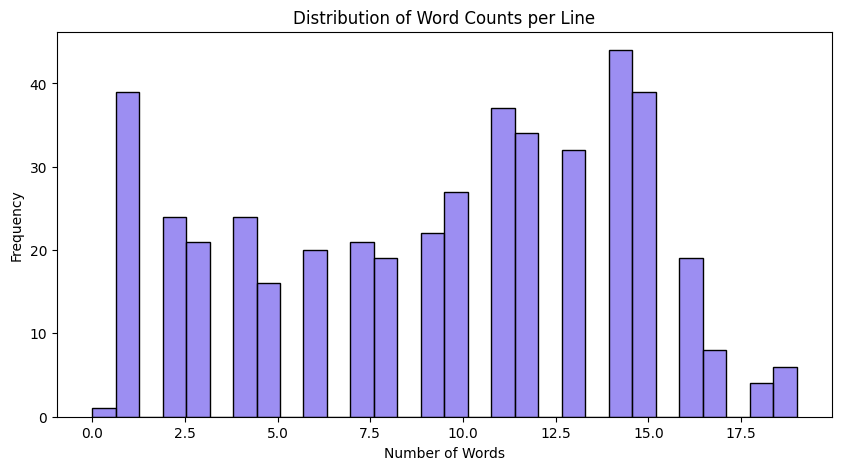

In [ ]:
df["Word_Count"] = df["Text"].apply(lambda x: len(x.split()))

# Kelime sayısı dağılımı
plt.figure(figsize=(10,5))
sns.histplot(df["Word_Count"], bins=30, color="mediumslateblue")
plt.title("Distribution of Word Counts per Line")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

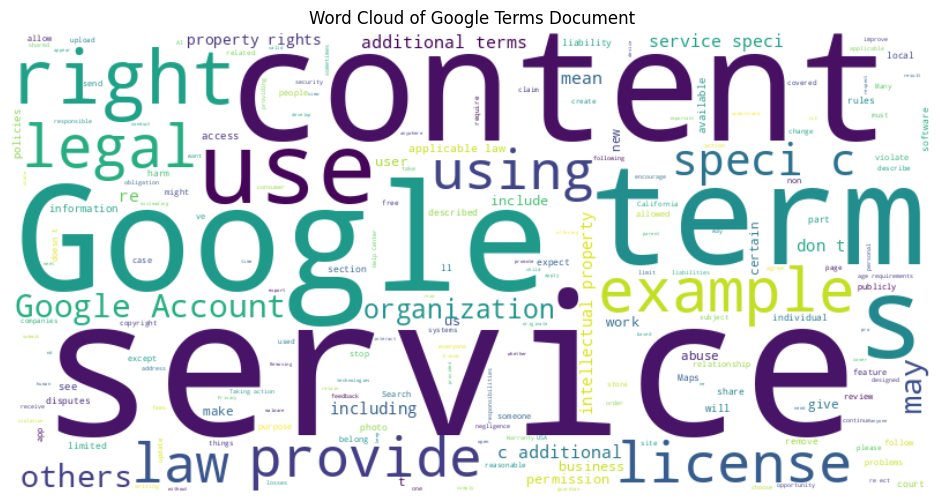

In [ ]:
text = " ".join(df["Text"].values)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Google Terms Document")
plt.show()

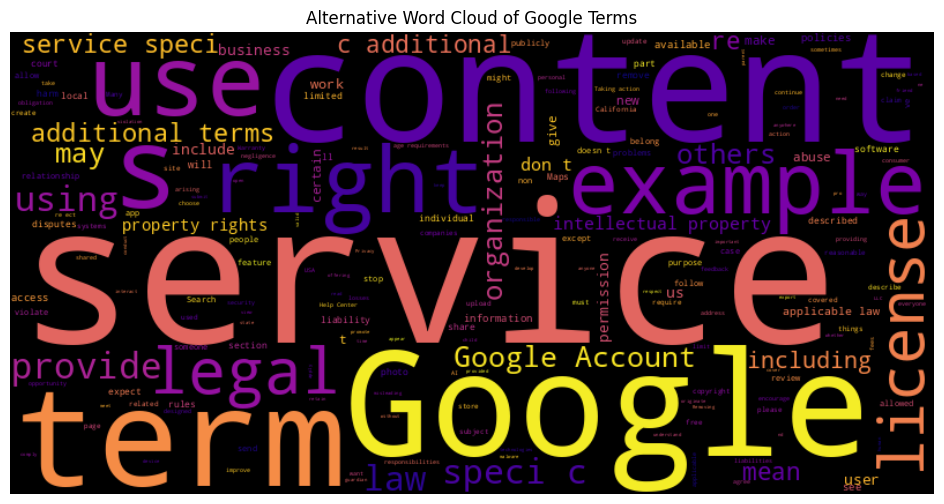

In [ ]:
stopwords = set(STOPWORDS)
wordcloud2 = WordCloud(width=800, height=400, background_color="black", colormap="plasma",
                       stopwords=stopwords, contour_color="white", contour_width=1).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Alternative Word Cloud of Google Terms")
plt.show()

<font color="#9A3F3F"><b>Preview Extracted Document Text</b>

In [ ]:
df['Text'].head(10)

,Text
0,GOOGLE TERMS OF SERVICE
1,"Effective May 22, 2024 | Archived versions"
2,What’s covered in these terms
3,We know it’s tempting to skip these Terms of
4,"Service, but it’s important to establish what you"
5,"can expect from us as you use Google services,"
6,and what we expect from you.
7,These Terms of Service re ect the way Google’s...
8,"our company, and certain things we’ve always b..."
9,of Service help de ne Google’s relationship wi...


In [ ]:
print(" ".join(df['Text'].tolist())[:500])

GOOGLE TERMS OF SERVICE Effective May 22, 2024 | Archived versions What’s covered in these terms We know it’s tempting to skip these Terms of Service, but it’s important to establish what you can expect from us as you use Google services, and what we expect from you. These Terms of Service re ect the way Google’s business works, the laws that apply to our company, and certain things we’ve always believed to be true. As a result, these Terms of Service help de ne Google’s relationship with you as


In [ ]:
document_text = " ".join(df['Text'].tolist())
print(document_text[1000:])

rights you have, and what to expect in case someone violates these terms Understanding these terms is important because, by accessing or using our services, you’re agreeing to these terms. Besides these terms, we also publish a Privacy Policy. Although it’s not part of these terms, we encourage you to read it to better understand how you can update, manage, export, and delete your information. Terms Service provider Google services are provided by, and you’re contracting with: Google LLC organized under the laws of the State of Delaware, USA, and operating under the laws of the USA 1600 Amphitheatre Parkway Mountain View, California 94043 USA Age requirements If you’re under the age required to manage your own Google Account, you must have your parent or legal guardian’s permission to use a Google Account. Please have your parent or legal guardian read these terms with you. If you’re a parent or legal guardian, and you allow your child to use the services, then these terms apply to you

<font color="#9A3F3F"><b>Modeling</b>

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, pipeline

model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

summary = summarizer(document_text[:1000], max_length=150, min_length=30, do_sample=False)
print("Summary:", summary[0]['summary_text'])

model.save_pretrained("saved_summarizer")
tokenizer.save_pretrained("saved_summarizer")


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Summary: these Terms of Service reect the way Google’s business works, the laws that apply to our company, and certain things we’ve always believed to be true . these terms include: what you can expect from us, which describes how we provide and develop our services What we expect from you, which establishes certain rules for using our services Content in Google services .


('saved_summarizer/tokenizer_config.json',
 'saved_summarizer/special_tokens_map.json',
 'saved_summarizer/spiece.model',
 'saved_summarizer/added_tokens.json')

<font color="#9A3F3F"><b>Conclusion</b>

Using LLMs like T5 for document analysis allows for fast, context-aware summarization of large text documents. This approach eliminates the need for manual reading and provides actionable insights efficiently. The saved model can be reused anytime, enabling seamless integration into applications like Streamlit for interactive document summarization.